In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [4]:
train_df = pd.read_csv("../data/train.csv")
customer_df = pd.read_csv("../data/customer.csv")
merged = pd.merge(train_df,customer_df,how='inner',on='individualnumber')

# There were 5 person missing "dateofbirth" attribute and 1 missing both "dateofbirth" and "gender" attributes.
# Since this number is too low, just drop the rows with missing "dateofbirth" or "gender" attribute.
merged = merged.dropna(subset=["dateofbirth", "gender"])
merged["age"] = 2022 - merged["dateofbirth"]
merged.astype(object).describe()

,individualnumber,category_number,hakkedis_amt,odul_amt,response,gender,city_code,dateofbirth,age
count,13109,13109,13109.0,13109.0,13109,13109,10223.0,13109.0,13109.0
unique,13109,49,121.0,20.0,2,2,82.0,80.0,80.0
top,94230288,9046,85.0,1.0,0,E,34.0,1980.0,42.0
freq,1,2074,1681.0,2942.0,12900,6944,2088.0,406.0,406.0


Aşağıda göründüğü gibi, kampanyadan yararlanmış olan bireylerin kampanyadan yararlanma sayısı her birey için 1. Yani bir kişi en fazla bir kez kampanyadan yararlanmış.

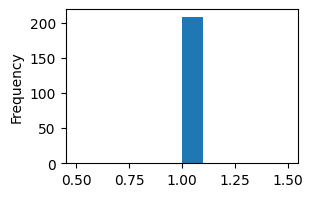

In [119]:
response_1 = merged[merged["response"] == 1]
response_1["individualnumber"].value_counts().plot(kind="hist", figsize=(3, 2))
plt.show()

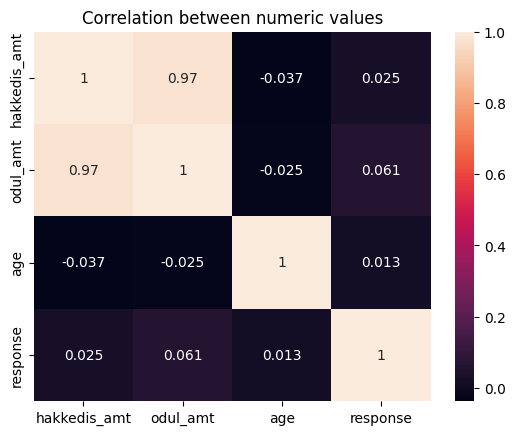

In [219]:
numeric_df = merged.drop(columns=["individualnumber", "category_number", "gender", "city_code", "dateofbirth"])[["hakkedis_amt", "odul_amt", "age", "response"]]
sns.heatmap(numeric_df.corr(), annot=True)
plt.title("Correlation between numeric values")
plt.show()

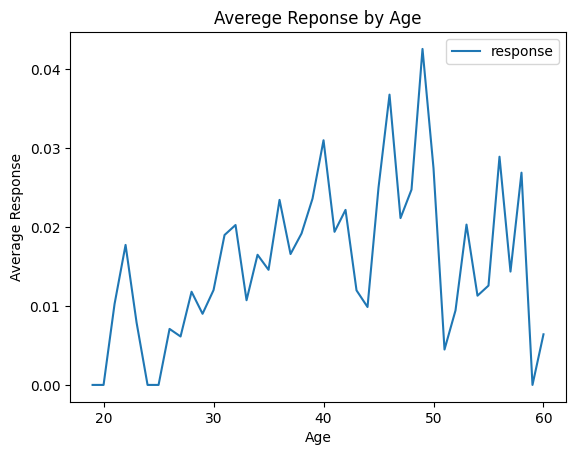

In [246]:
age_dropped = numeric_df[(numeric_df["age"] <= 60) & (numeric_df["age"] >= 10)]
age_dropped[["age", "response"]].groupby("age").mean().plot(xlabel="Age", ylabel="Average Response")
plt.title("Averege Reponse by Age")
plt.show()

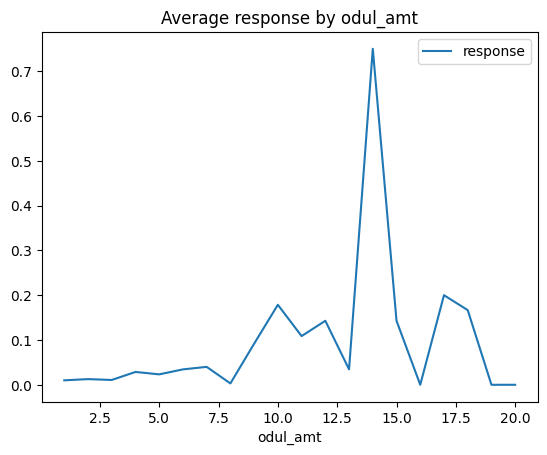

In [244]:
numeric_df[["odul_amt", "response"]].groupby("odul_amt").mean().plot()
plt.title("Average response by odul_amt")
plt.show()

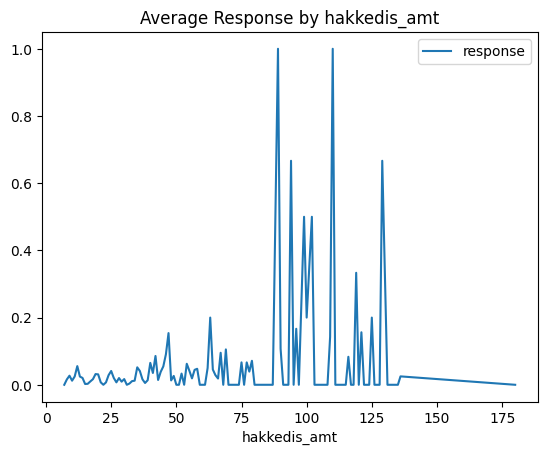

In [250]:
numeric_df[["hakkedis_amt", "response"]].groupby("hakkedis_amt").mean().plot()
plt.title("Average Response by hakkedis_amt")
plt.show()